In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statistics as stat

In [23]:
#Create a correlation matrix and pick the best two features for modelling using linear regression.
data = pd.read_csv("ENB2012_data.CSV")

In [33]:
d = data.dropna(how='all')
d1= d.dropna(axis = 'columns', how = 'all')
features = d1.values[:, 0:-2]
y1 = d1.values[:, -2]
y2 = d1.values[:, -1]
corr = d1.corr()
corr

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


Mean squared error: 3.10
R2 score: 0.90


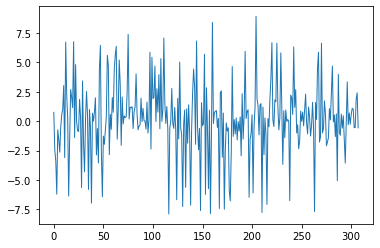

In [44]:
#Develop a linear regression model for estimating y1 (heating load) using 60 percent 
#of data picked randomly for training and remaining for testing.  
#Visualise your model prediction using appropriate plots. Report the RMSE and R-squared score. 
X_train, X_test, y_train, y_test = train_test_split(features, y1, test_size=0.4, random_state=1)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))
residuals = y_pred - y_test
plt.plot(residuals, linewidth=1)

In [72]:
#Try the approach with all input features, i) without normalising input data
#ii) with normalising input data.
def linear_regre(x,y,percent, i):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=percent, random_state= i)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return rmse, r_squared
def normalise(x):
    min_x = x.min(0) 
    max_x = x.max(0)
    normalised_x = (x - min_x) / (max_x - min_x)
    return normalised_x

In [73]:
rmse_normalised, r_squred_normalised = linear_regre(normalise(features), y1, 0.4, 1)

In [74]:
print('Mean Squared Error with Normalisetion: ', rmse_normalised)     
print('R2 Score with Normalisation:',r_squred_normalised)

Mean Squared Error with Normalisetion:  3.105656236427757
R2 Score with Normalisation: 0.9027914582416653


In [75]:
#Run 30 experiments each and report the mean and std of the RMSE and R-squared score 
#of the train and test datasets
rmsel = []
r2l = []
for i in range(0, 30):
    rmse, r_squared = linear_regre(features, y1, 0.4, i)
    rmsel.append(rmse)
    r2l.append(r_squared)
mean_rmse = sum(rmsel)/len(rmsel)
mean_r2 = sum(r2l)/len(r2l)
sd_rmse = stat.stdev(rmsel)
sd_r2 = stat.stdev(r2l)

In [77]:
print('Mean and Standard Deviation of RMSE:', mean_rmse, sd_rmse)
print('Mean and Standard Deviation of RMSE:', mean_r2, sd_r2)

Mean and Standard Deviation of RMSE: 2.9973671156590305 0.09404575390354628
Mean and Standard Deviation of RMSE: 0.9111853114260041 0.005620226792953343
